<a href="https://colab.research.google.com/github/simulate111/Data-Science_2024/blob/main/mini%20project%203CoPi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Upload files from local drive
from google.colab import files
uploaded = files.upload()

Saving relationships.csv to relationships (1).csv
Saving schools.csv to schools (1).csv
Saving artists.csv to artists (1).csv
Saving institutions.csv to institutions (1).csv


In [17]:
import pandas as pd

# Load the datasets
artists = pd.read_csv('artists.csv')
relationships = pd.read_csv('relationships.csv')
institutions = pd.read_csv('institutions.csv')
schools = pd.read_csv('schools.csv')

# Check for missing values
print(artists.isnull().sum())
print(relationships.isnull().sum())
print(institutions.isnull().sum())
print(schools.isnull().sum())

# Basic statistics
print(artists.describe())
print(relationships.describe())
print(institutions.describe())
print(schools.describe())


artistUrl           0
id                  0
image               0
nation             32
title               0
totalWorksTitle     0
year                1
dtype: int64
artistUrl           0
friends          2580
influenced_by    2512
influenced_on    2637
institution      2362
movements          40
school           1966
type                1
dtype: int64
city       2
country    2
title      0
url        0
dtype: int64
title    0
url      0
dtype: int64
                            artistUrl                        id  \
count                            2996                      2996   
unique                           2996                      2996   
top     /en/ancient-egyptian-painting  5d230b31edc2c9fb74ae130a   
freq                                1                         1   

                                                    image    nation  \
count                                                2996      2964   
unique                                               2996       10

In [18]:
# Fill missing values for 'nation' and 'year' in artists dataset
artists = artists.assign(nation=artists['nation'].fillna('Unknown'))
artists = artists.assign(year=artists['year'].fillna('Unknown'))

# Fill missing values for 'friends', 'influenced_by', 'influenced_on', 'institution', 'movements', and 'school' in relationships dataset
relationships = relationships.assign(friends=relationships['friends'].fillna(''))
relationships = relationships.assign(influenced_by=relationships['influenced_by'].fillna(''))
relationships = relationships.assign(influenced_on=relationships['influenced_on'].fillna(''))
relationships = relationships.assign(institution=relationships['institution'].fillna(''))
relationships = relationships.assign(movements=relationships['movements'].fillna(''))
relationships = relationships.assign(school=relationships['school'].fillna(''))

# Fill missing values for 'city' and 'country' in institutions dataset
institutions = institutions.assign(city=institutions['city'].fillna('Unknown'))
institutions = institutions.assign(country=institutions['country'].fillna('Unknown'))

# Verify that there are no more missing values
print(artists.isnull().sum())
print(relationships.isnull().sum())
print(institutions.isnull().sum())
print(schools.isnull().sum())


artistUrl          0
id                 0
image              0
nation             0
title              0
totalWorksTitle    0
year               0
dtype: int64
artistUrl        0
friends          0
influenced_by    0
influenced_on    0
institution      0
movements        0
school           0
type             1
dtype: int64
city       0
country    0
title      0
url        0
dtype: int64
title    0
url      0
dtype: int64


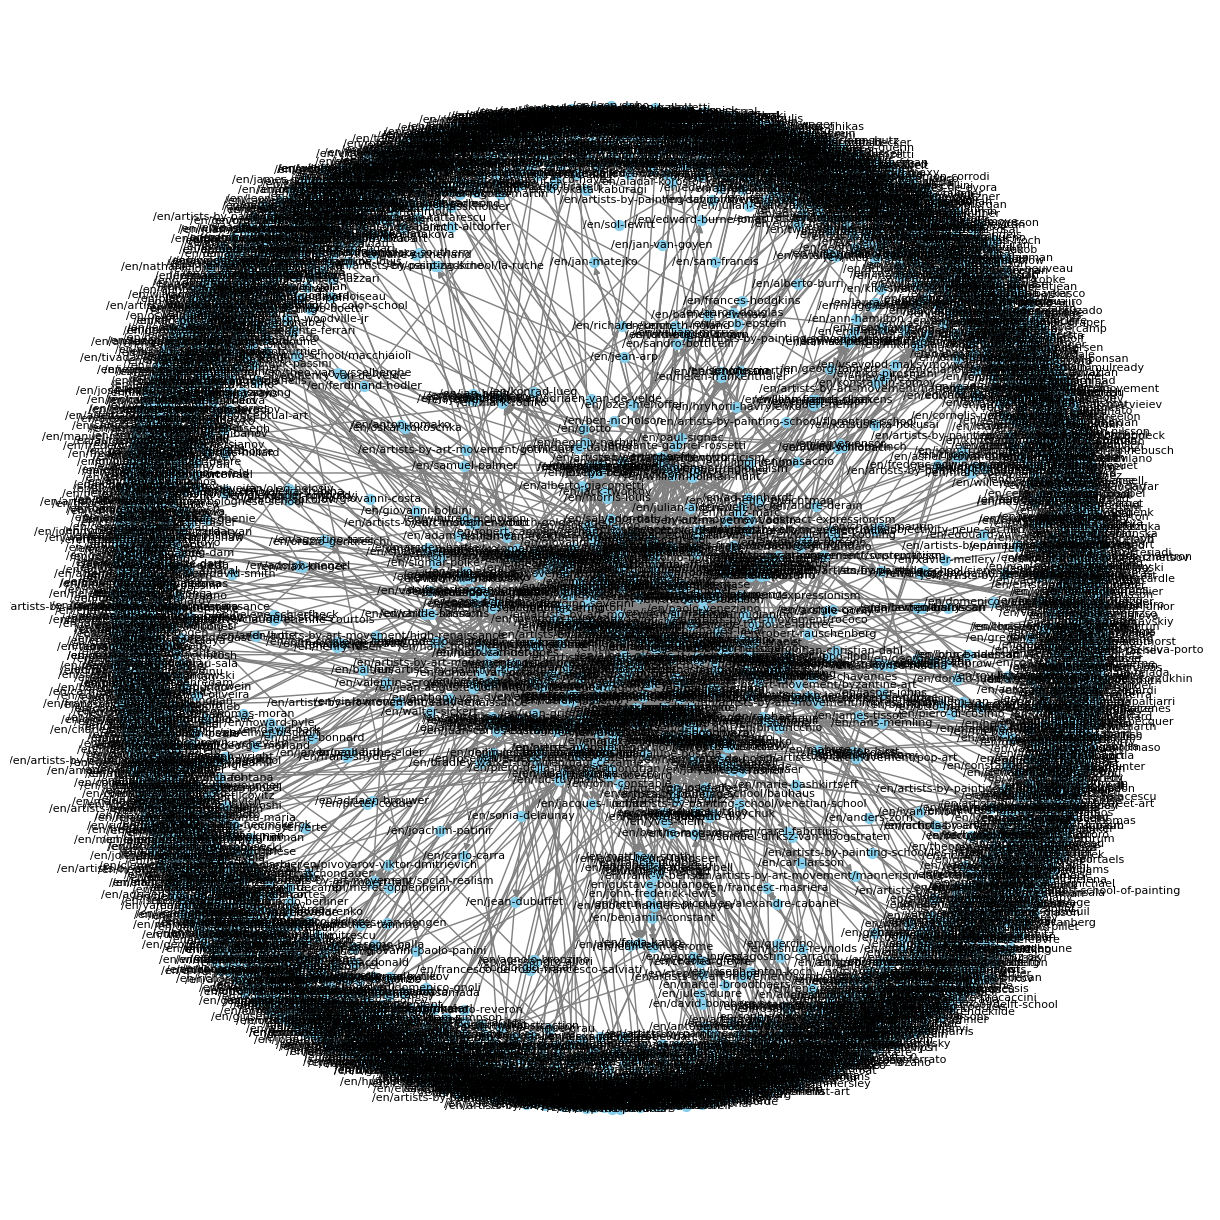

In [13]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges from the relationships dataset
for index, row in relationships.iterrows():
    artist = row['artistUrl']
    friends = row['friends'].split(',')
    influenced_by = row['influenced_by'].split(',')
    influenced = row['influenced_on'].split(',')

    G.add_node(artist, type='artist')

    for friend in friends:
        if friend:
            G.add_edge(artist, friend, relationship='friend')

    for influence in influenced_by:
        if influence:
            G.add_edge(influence, artist, relationship='influenced_by')

    for influence in influenced:
        if influence:
            G.add_edge(artist, influence, relationship='influenced')

# Visualize the network
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=50, node_color="skyblue", font_size=8, font_color="black", edge_color="gray")
plt.show()


In [14]:
# Centrality measures
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

# Community detection
from networkx.algorithms.community import greedy_modularity_communities

communities = greedy_modularity_communities(G)

# Answering the questions
# 1. Most influential artists
most_influential_artists = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Most Influential Artists:", most_influential_artists)

# 2. Most influential movements (assuming movements are part of the relationships dataset)
# This would require additional data processing to identify movements

# 3. Most influential institutions
# This would require linking artists to institutions and analyzing their influence

# 4. Nationalities with the majority of artists
nationalities = artists['nation'].value_counts()
print("Nationalities with the Majority of Artists:", nationalities)

# 5. Biggest communities in the network
biggest_communities = sorted(communities, key=len, reverse=True)[:5]
print("Biggest Communities in the Network:", biggest_communities)


Most Influential Artists: [('/en/pablo-picasso', 0.019340519974635383), ('/en/amedeo-modigliani', 0.012365250475586557), ('/en/paul-gauguin', 0.011414077362079899), ('/en/pierre-auguste-renoir', 0.011414077362079899), ('/en/jackson-pollock', 0.011414077362079899), ('/en/andy-warhol', 0.01046290424857324), ('/en/claude-monet', 0.010145846544071021), ('/en/paul-cezanne', 0.009828788839568801), ('/en/edouard-manet', 0.009511731135066582), ('/en/robert-delaunay', 0.008877615726062143)]
Nationalities with the Majority of Artists: nation
American        520
French          402
Italian         269
British         249
German          160
               ... 
Italians          1
Bangladeshis      1
Romanians         1
Bosnian           1
Cameroonian       1
Name: count, Length: 107, dtype: int64
Biggest Communities in the Network: [frozenset({'/en/adam-elsheimer', '/en/jan-steen', '/en/louise-abbema', '/en/paul-albert-besnard', '/en/antoine-watteau', '/en/giuseppe-de-nittis', '/en/jacob-van-ruis